<a href="https://colab.research.google.com/github/vegger/MLDM/blob/main/labs/L04_Polynomial_and_Logistic_Regression_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
RANDOM_SEED = 0x0

# TASK 1: Polynomial Regression (5 Points): 

Let's create and explore the data.

In [4]:
# set the random seed to an RANDOM_SEED, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

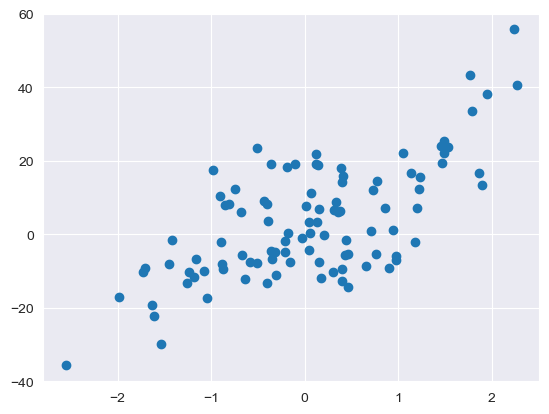

In [5]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20), set `random_state` to `RANDOM_SEED`.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=RANDOM_SEED, train_size=0.8, test_size=0.2)

2. Apply Linear Regression on the data and predict `y` values for training as well test data 

In [7]:
from sklearn.linear_model import LinearRegression 
lrY_train = LinearRegression().fit(X_train, y_train)
lrY_test = LinearRegression().fit(X_test, y_test)

3. Calculate MSE for training as well as for test data.

In [8]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, lrY_train.predict(X_train))
mse_test = mean_squared_error(y_test, lrY_test.predict(X_test))

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 131.3354142667106
MSE of test data: 116.9150848321741


4. Visualize the model's artefacts: Plot all the data as well as Linear Regression predictions for training and test data in a scatter plot. Don't forget a legend to differentiate the data.

In [9]:
def plot_artefacts(train_data_points, train_regression, test_data_points, test_regression, title=None):
    plt.figure()
    plt.scatter(train_data_points[0], train_data_points[1], color="blue", label="train data points")
    plt.scatter(train_data_points[0], train_regression, color="pink", label="train regression")
    plt.scatter(test_data_points[0], test_data_points[1], color="green", label="test data points")
    plt.scatter(test_data_points[0], test_regression, color="red", label="test regression")
    plt.title(title)
    plt.legend()
    plt.show()

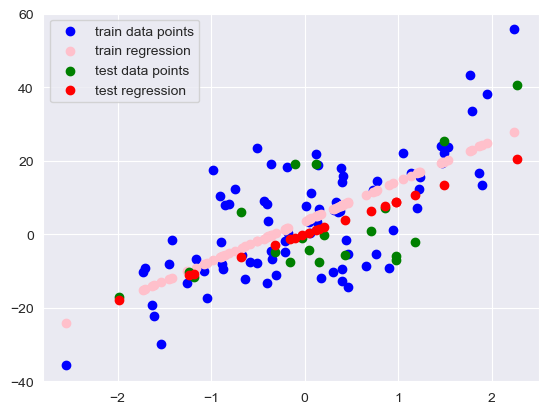

In [10]:
plot_artefacts([X_train, y_train], lrY_train.predict(X_train), [X_test, y_test], lrY_test.predict(X_test))

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the training and test data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [11]:
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(x_train_data, y_train_data, x_test_data, y_test_data, degree):
    x_train_data = PolynomialFeatures(degree).fit_transform(x_train_data) # check if y_train_data as param makes a change
    x_test_data = PolynomialFeatures(degree).fit_transform(x_test_data)

    lrY_train = LinearRegression().fit(x_train_data, y_train_data)
    lrY_test = LinearRegression().fit(x_test_data, y_test_data)

    y_pred_train_poly = lrY_train.predict(x_train_data)
    y_pred_test_poly = lrY_test.predict(x_test_data)

    mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
    mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

    return y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly

In [12]:
y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(X_train, y_train, X_test, y_test, 2)
print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

MSE of training data: 129.64199704420648
MSE of test data: 106.25833697429216


6. Did it perform better than Linear Regression? Visualize the results similar to **Task 1a) 4**.

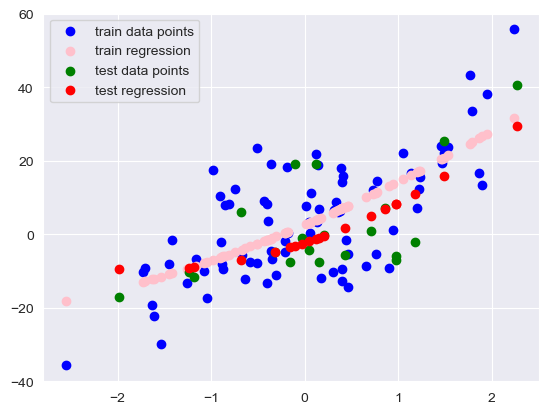

In [13]:
model = LinearRegression()
model.fit(y_pred_train_poly, y_train)
plot_artefacts([X_train, y_train], model.predict(y_pred_train_poly), [X_test, y_test], model.predict(y_pred_test_poly))

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in `range(0, 11)`. Visualize the results similar to **Task 1a) 4** and plot MSE (on training as well as test data) as a function of the number of the polynomial degrees. 

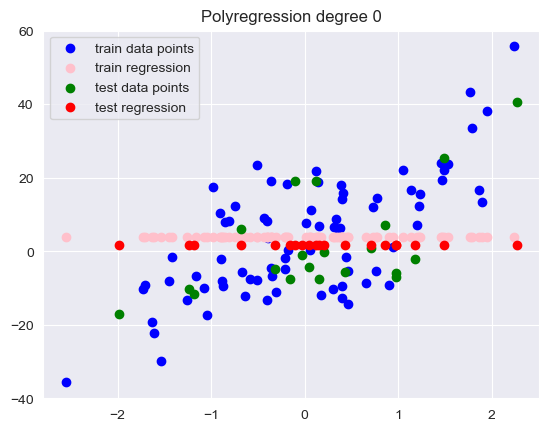

252.5590649070403 194.35974138396747


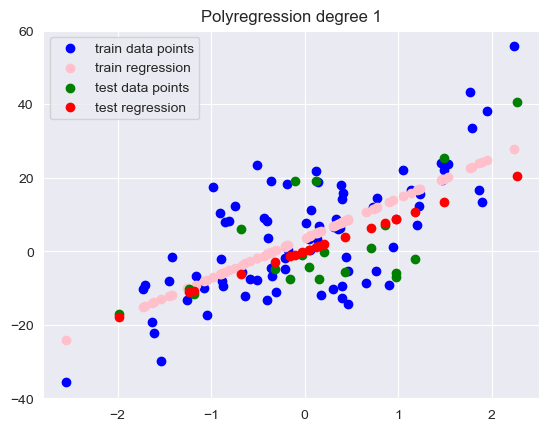

131.3354142667106 116.9150848321741


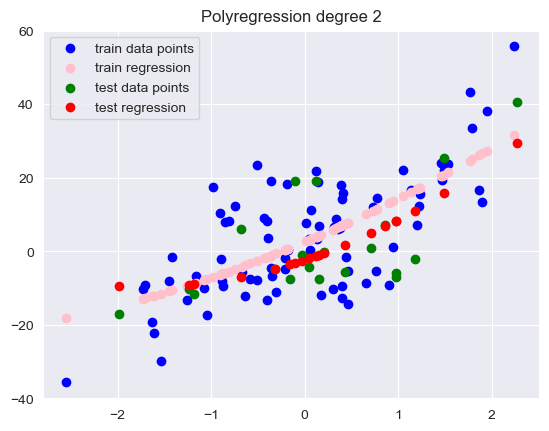

129.64199704420648 106.25833697429216


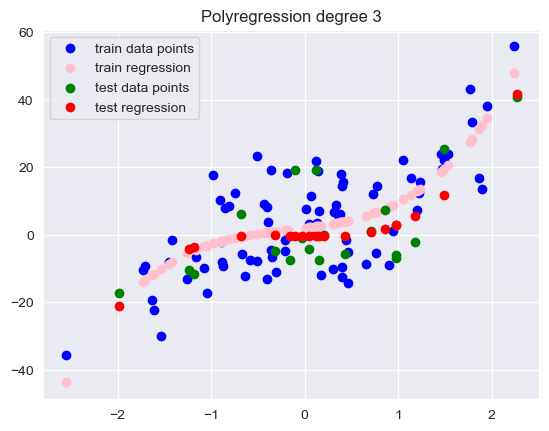

107.95218526581712 77.44719329671551


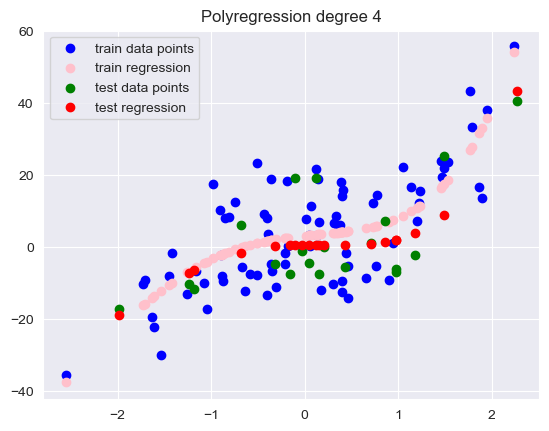

105.67902403745693 75.18640271439398


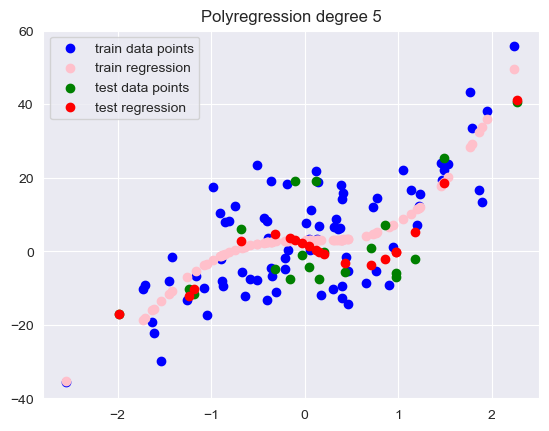

104.44086502216433 62.26469560890958


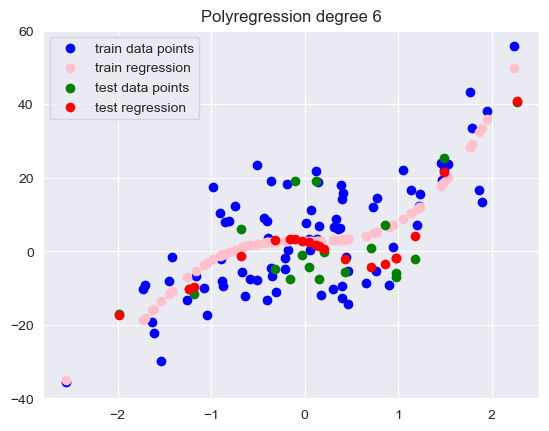

104.43485364972109 59.84123848666211


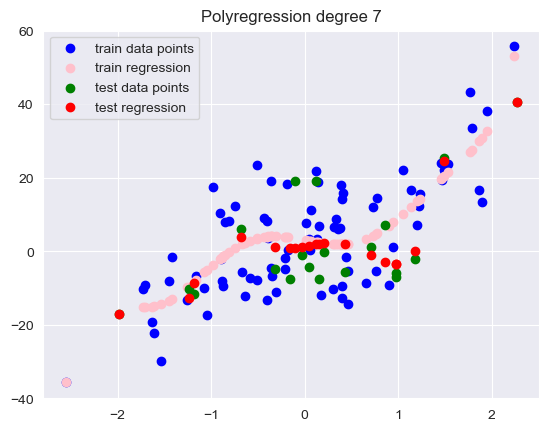

102.12974684477726 54.098146430415355


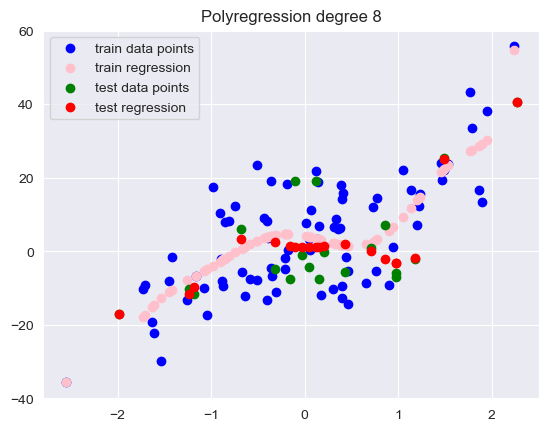

100.93920532650185 53.508622338711994


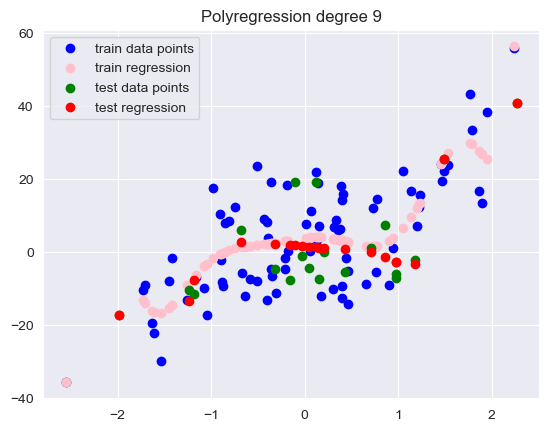

97.08026571205137 52.90321229906915


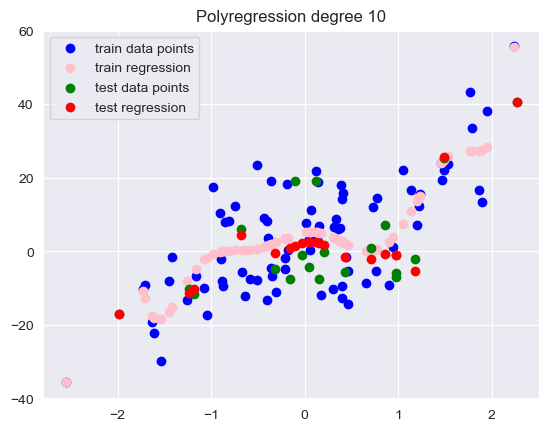

95.86017297350313 50.570842987999654
mses_train_poly:
[252.5590649070403, 131.3354142667106, 129.64199704420648, 107.95218526581712, 105.67902403745693, 104.44086502216433, 104.43485364972109, 102.12974684477726, 100.93920532650185, 97.08026571205137, 95.86017297350313]
mses_test_poly:
[194.35974138396747, 116.9150848321741, 106.25833697429216, 77.44719329671551, 75.18640271439398, 62.26469560890958, 59.84123848666211, 54.098146430415355, 53.508622338711994, 52.90321229906915, 50.570842987999654]


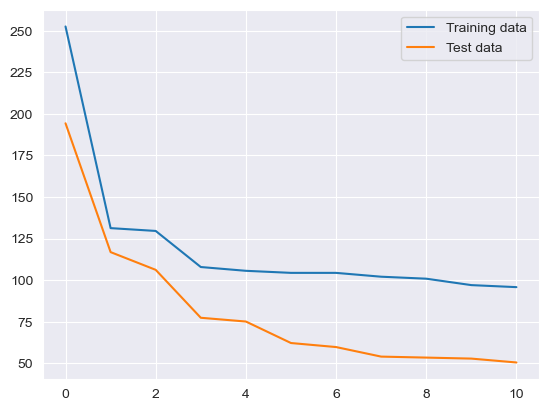

In [14]:
mses_test_poly = []
mses_train_poly = []

for i in range(0, 11):
    y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(X_train, y_train, X_test, y_test, i)
    plot_artefacts([X_train, y_train], y_pred_train_poly, [X_test, y_test], y_pred_test_poly, "Polyregression degree {}".format(i))
    mses_test_poly.append(mse_test_poly)
    mses_train_poly.append(mse_train_poly)
    print(mse_train_poly, mse_test_poly)

plt.plot(range(0, 11), mses_train_poly, label="Training data")
print("mses_train_poly:")
print(mses_train_poly)
plt.plot(range(0, 11), mses_test_poly, label="Test data")
print("mses_test_poly:")
print(mses_test_poly)
plt.legend()
plt.show()

## 📢 **HAND-IN** 📢: Answer following questions in Moodle:

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? How do the models behave with polynomial degrees >= 8? 

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

Vali's Antwort:
[[1, 3, 9], -> 3^(0 bis 2)
 [1, 2, 4], -> 2^(0 bis 2)
 [1, 0, 0]] -> 0^(0 bis 2)

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

## 📢 **HAND-IN** 📢: Write your answer in Moodle

# Task 3: Logistic Regression (4 Points)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set()

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load and explore the dataset.



In [16]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


In [17]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the training data and set random state = 42.

In [18]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int64')
X_train = X_train.reshape(X_train.shape[0], -1)
print(X_train.shape)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

(60000, 784)


#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

<Figure size 1000x1000 with 0 Axes>

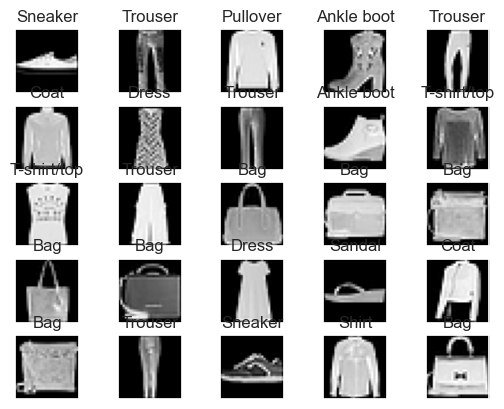

In [19]:
plt.figure(figsize=(10,10))

def plot_25_images(X_data, y_data):
    fix, axs = plt.subplots(5, 5)
    for i in range(5):
        for j in range(5):
            # Select a random index from X_train
            idx = np.random.randint(0, len(X_data))

            # Plot the image and set the label as the title
            axs[i, j].imshow(X_data[idx].reshape(28, 28), cmap='gray') # cmap='gray' verstärkt den Unterschied von normalisiert zu unnormalisiert
            axs[i, j].set_title(label_names[y_data[idx]])

            # Remove the axis ticks
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

    plt.show()

plot_25_images(X_train, y_train)

#### Normalize the Images
With mean and standard deviation

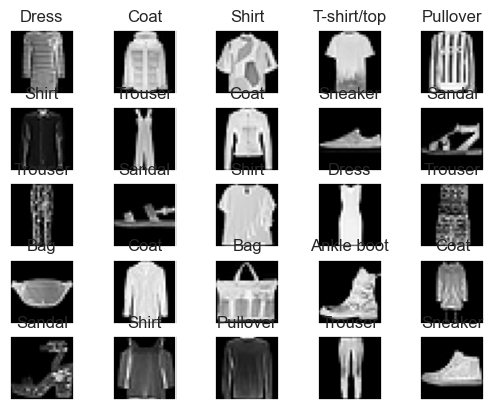

In [20]:
X_train_normalized = (X_train - X_train.mean()) / X_train.std()
X_test_normalized = (X_test - X_train.mean()) / X_train.std()
plot_25_images(X_train_normalized, y_train)


## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`. Set the `random_state` for reproducibility.
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

Please, check the documentation on:
GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

You can ignore a warning "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT." as long as GridSearchCV continues with the next hyperparameter and you reach the necessary accuracy.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
# We use predefined split in order to control that no train samples would be used in validation step


train_indices = np.full((X_train.shape[0],), -1, dtype=int)
test_indices = np.full((X_test.shape[0],), 0, dtype=int)
ps = PredefinedSplit(np.append(train_indices, test_indices))

param_grid = {'C': [0.01,0.1,2.,3.,4.,6.,10]}

clf = LogisticRegression(random_state=RANDOM_SEED)
opt = GridSearchCV(clf, param_grid, cv=ps, n_jobs=-1)

# when we fit the model, we should use both training and validation samples
opt.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

# Print the best hyperparameters and the corresponding accuracy score on the validation data
print('Best hyperparameters:', opt.best_params_)
print('Accuracy:', opt.best_score_)

Best hyperparameters: {'C': 0.01}
Accuracy: 0.8491666666666666
{'C': 0.01}


C:\Users\egger\anaconda3\envs\MLDM\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Use the best found parameters for the next steps. `GridSearchCV` provides them in the `best_params_` attribute.

3. Create a new `LogisticRegression` instance with the best found parameters.
4. Fit it on the training set.
5. Calculate the accuracy on the validation set.

In [29]:
from sklearn.metrics import accuracy_score

clf = LogisticRegression(C=opt.best_params_["C"], random_state=RANDOM_SEED)
opt = GridSearchCV(clf, param_grid, cv=ps, n_jobs=-1)

# when we fit the model, we should use both training and validation samples
opt.fit(np.concatenate((X_train, X_test)), np.concatenate((y_train, y_test)))

# Print the best hyperparameters and the corresponding accuracy score on the validation data
print('Best hyperparameters:', opt.best_params_)
print('Accuracy:', opt.best_score_)


Best hyperparameters: {'C': 0.01}
Accuracy: 0.8491666666666666


C:\Users\egger\anaconda3\envs\MLDM\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 📢 **HAND-IN** 📢: Report in Moodle the accuracy you got in this task.